# Problem statement:
## Given an email can you classify it as "Spam" or Not spam?

# Import Necessary Libraries 

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  # type: ignore


# Loading the dataset

In [7]:
df=pd.read_csv('emails.csv')

# Data Exploration

In [8]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [9]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [10]:
df.shape

(5728, 2)

In [12]:
df.columns

Index(['text', 'spam'], dtype='object')

In [13]:
df.dtypes

text    object
spam     int64
dtype: object

In [15]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [18]:
df.duplicated().sum()

33

# Making a copy of the dataset

In [26]:
df_copy=df.copy()

In [25]:
df.drop_duplicates(inplace=True)


In [19]:
df['text'][10]

"Subject: las vegas high rise boom  las vegas is fast becoming a major metropolitan city ! 60 +  new high rise towers are expected to be built on and around the las vegas strip  within the next 3 - 4 years , that ' s 30 , 000 + condominiums !  this boom has just begun ! buy first . . . early phase ,  pre - construction pricing is now available on las vegas high rises including  trump , cosmopolitan , mgm , turnberry , icon , sky , among others .  join the interest list :  http : / / www . verticallv . com  message has been sent to you by realty one highrise . learn more at www . verticallv . comif you  wish to be excluded from future mailings , please reply with the word remove in  the subject line . "

In [21]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

<Axes: >

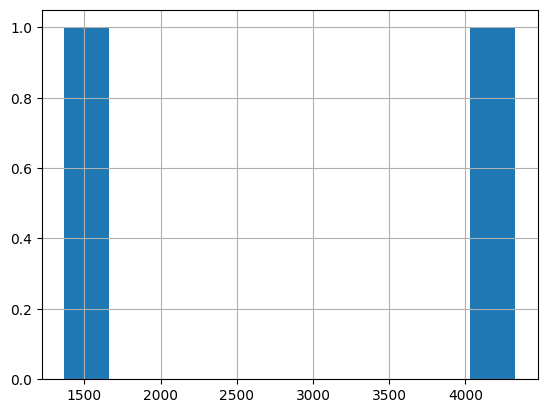

In [35]:
df['spam'].value_counts().hist(bins=10)

In [37]:
df.shape

(5695, 2)

<Axes: ylabel='count'>

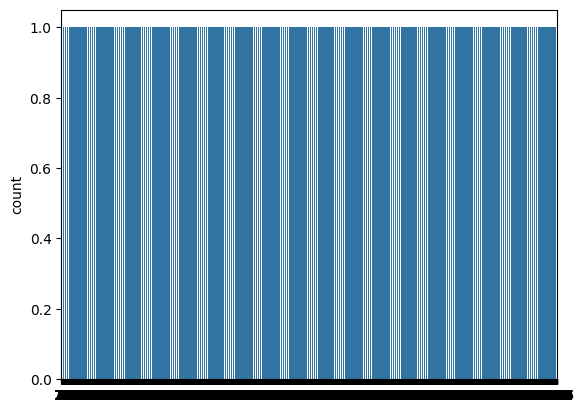

In [38]:
sns.countplot(df['spam'])

In [39]:
df['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

# Splitting Data in X and Y 

In [40]:
X=df['text'].values
y=df['spam'].values


In [41]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
X

array(["Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42) 



In [46]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0) 


In [48]:
X_train.shape

(4556,)

In [49]:
X_test.shape

(1139,)

In [50]:
y_test.shape

(1139,)

# Preprocessing 

In [51]:
from sklearn.feature_extraction.text import CountVectorizer


In [54]:
cv=CountVectorizer()

In [55]:
x_train=cv.fit_transform(X_train)

In [56]:
x_train.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [59]:
len(x_train.toarray())

4556

In [61]:
from sklearn.naive_bayes import MultinomialNB 

In [63]:
nb=MultinomialNB()

In [64]:
nb.fit(x_train, y_train)


MultinomialNB()

In [65]:
x_test=cv.transform(X_test)

In [66]:
len(x_test.toarray())

1139

In [67]:
len(x_test.toarray()[0])

33126

In [68]:
y_predict=nb.predict(x_test)


In [69]:
from sklearn.metrics import accuracy_score 

In [75]:
print("+++++++++++Testing the Accuracy:++++++++++++++++++++++++++++")
accuracy_score(y_predict, y_test)



+++++++++++Testing the Accuracy:++++++++++++++++++++++++++++


0.990342405618964

In [77]:
print("+++++++++++Training the Accuracy:++++++++++++++++++++++++++++")
nb.score(x_train, y_train)



+++++++++++Training the Accuracy:++++++++++++++++++++++++++++


0.995171202809482

# Testing the model

In [78]:
sample_email=['You have won 1000! claim it now!']

In [82]:
clean_sample=cv.transform(sample_email)


In [83]:
len(clean_sample.toarray()[0])


33126

In [84]:
verify=nb.predict(clean_sample)[0]


In [85]:
verify

1

# Evaluate function

In [87]:
#email=['Hello! what are you waiting for! You won 1000. Go ahead and cash out']

In [92]:
email=['Hey i am Elon Musk. Get a brand new car from Tesla']

In [93]:
clean_email=cv.transform(email)

In [94]:
check=nb.predict(clean_email)[0]

if check == 0:
    print("No cause of alarm! It is ham message ")
else:
    print("Becarefull. This looks suspicious")
    

Becarefull. This looks suspicious


In [95]:
from sklearn.pipeline import make_pipeline 


In [96]:
pipe=make_pipeline(cv, nb)


In [97]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [98]:
y_predict=pipe.predict(X_test)

In [99]:
pipe.predict(email)

array([1])

# Pickling the model

In [100]:
import pickle 


In [101]:
pickle.dump(pipe, open('my_model_naive.pk', 'wb'))
